## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results , on="Mouse ID", how="outer")
merge_df
# Display the data table for preview
# Read the mouse data and the study results


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
Total_mouse = merge_df["Mouse ID"].value_counts()
Total_mouse

g989    13
s565    10
y769    10
w422    10
s337    10
        ..
u153     1
h428     1
b447     1
x336     1
v199     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dups_id = merge_df.loc[merge_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
dups_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_data = merge_df.loc[merge_df["Mouse ID"] != "g989"]
all_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merge_df.drop_duplicates(subset = ["Mouse ID"])
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse = clean_data["Mouse ID"].value_counts()
mouse

s565    1
d133    1
b742    1
m756    1
v764    1
       ..
s508    1
z234    1
a203    1
a685    1
l264    1
Name: Mouse ID, Length: 249, dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
regimen_all = merge_df.groupby(["Drug Regimen"])
tumor_volume = regimen_all["Tumor Volume (mm3)"].sum()
regimen_mean = regimen_all["Tumor Volume (mm3)"].mean()
regimen_median = regimen_all["Tumor Volume (mm3)"].median()
regimen_variance = regimen_all["Tumor Volume (mm3)"].var()
regimen_std = regimen_all["Tumor Volume (mm3)"].std()
regimen_sem = regimen_all["Tumor Volume (mm3)"].sem()
summary_stats = pd.DataFrame({"Total Tumor Volume": tumor_volume, "Mean": regimen_mean, "Median":regimen_median, "Variance":regimen_variance, "Standard Deviation": regimen_std, "SEM": regimen_sem}).round(2)
summary_stats

,Total Tumor Volume,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,,
Capomulin,9355.42,40.68,41.56,24.95,4.99,0.33
Ceftamin,9361.23,52.59,51.78,39.29,6.27,0.47
Infubinol,9413.49,52.88,51.82,43.13,6.57,0.49
Ketapril,10384.30,55.24,53.70,68.55,8.28,0.60
Naftisol,10105.67,54.33,52.51,66.17,8.13,0.60
Placebo,9780.08,54.03,52.29,61.17,7.82,0.58
Propriva,8423.93,52.32,50.85,42.35,6.51,0.51
Ramicane,9169.42,40.22,40.67,23.49,4.85,0.32
Stelasyn,9816.20,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

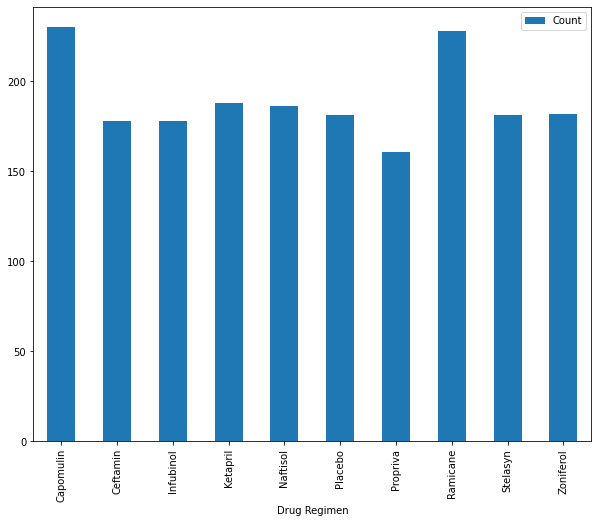

In [8]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
grouped_df = pd.DataFrame(merge_df.groupby(["Drug Regimen"]).count()).reset_index()
regimen_bar = grouped_df[["Drug Regimen","Mouse ID"]]
regimen_bar = regimen_bar.rename(columns={"Mouse ID": "Count"})
regimen_bar = regimen_bar.set_index("Drug Regimen")
regimen_bar.plot(kind="bar", figsize=(10,8))
plt.show()

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.


NameError: name 'np' is not defined

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



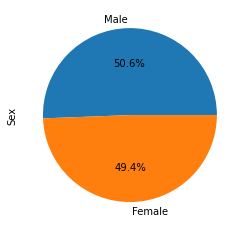

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_pylot=merge_df["Sex"].value_counts()
plt.pie(mice_pylot.values, labels = mice_pylot.index.values, autopct = "%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
